In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import datetime as dt

In [29]:
stocks = ["AAPL","MSFT","NVDA","AMZN"]
weights = np.array([0.25,0.25,0.25,0.25])

if not np.isclose(weights.sum(),1):
    raise ValueError("Los pesos deben sumar 1")

end = dt.datetime.now()
start = end - dt.timedelta(days=365*3)

In [30]:
prices = yf.download(stocks,start=start,end=end,progress=False)["Close"]
returns = prices.pct_change().dropna()

mean_returns = returns.mean()
cov_matrix = returns.cov()

print("Media diaria retornos:")
print(mean_returns)
print("\\nMatriz de covarianza:")
print(cov_matrix)

Media diaria retornos:
Ticker
AAPL    0.000917
AMZN    0.001201
MSFT    0.000741
NVDA    0.003407
dtype: float64
\nMatriz de covarianza:
Ticker      AAPL      AMZN      MSFT      NVDA
Ticker                                        
AAPL    0.000263  0.000144  0.000106  0.000179
AMZN    0.000144  0.000387  0.000167  0.000272
MSFT    0.000106  0.000167  0.000221  0.000237
NVDA    0.000179  0.000272  0.000237  0.000967


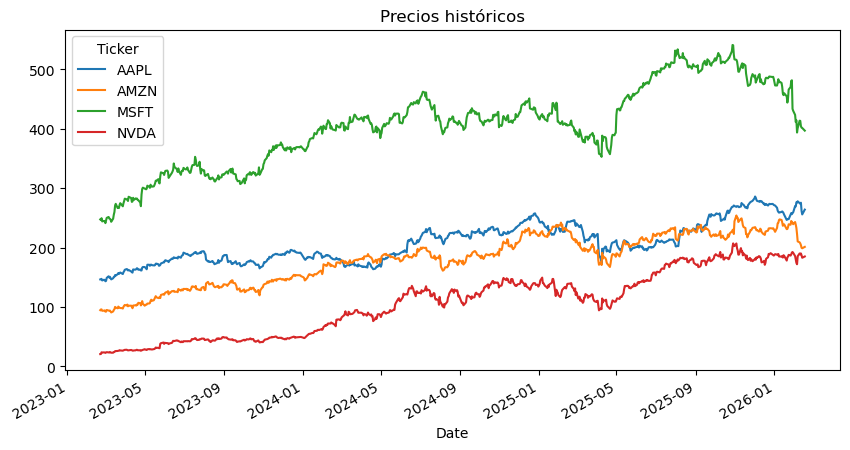

In [31]:
prices.plot(figsize=(10,5),title="Precios históricos")
plt.show()

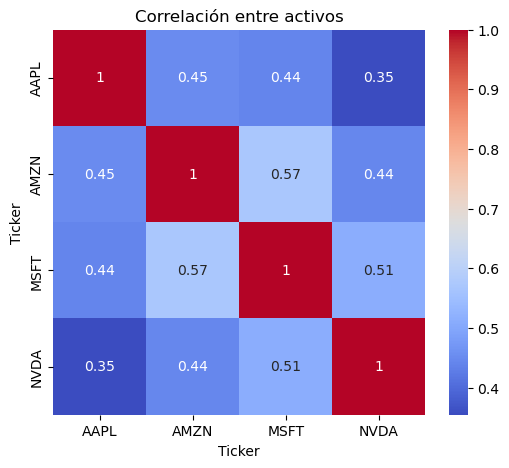

In [32]:
plt.figure(figsize=(6,5))
sns.heatmap(returns.corr(),annot=True,cmap="coolwarm")
plt.title("Correlación entre activos")
plt.show()

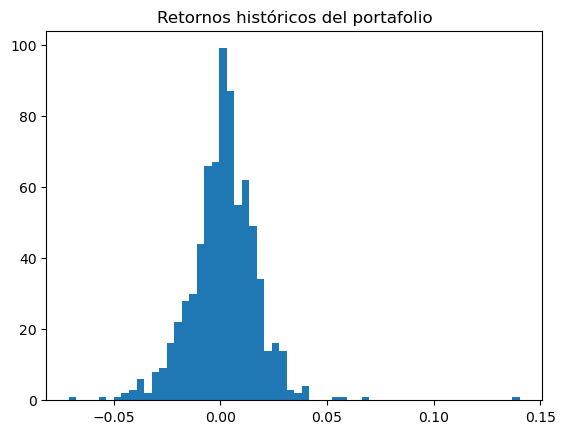

Volatilidad histórica diaria: 0.0158984000253045


In [33]:
portfolio_hist = returns.dot(weights)

plt.hist(portfolio_hist,bins=60)
plt.title("Retornos históricos del portafolio")
plt.show()

print("Volatilidad histórica diaria:", portfolio_hist.std())

In [34]:
num_sim = 5000
num_days = 252
k = len(stocks)

L = np.linalg.cholesky(cov_matrix)
portfolio_paths = np.zeros((num_days,num_sim))

In [35]:
for m in range(num_sim):

    Z = np.random.normal(size=(num_days,k))
    correlated = Z @ L.T
    daily_returns = correlated + mean_returns.values
    port_daily = daily_returns @ weights
    portfolio_paths[:,m] = np.cumprod(1+port_daily)

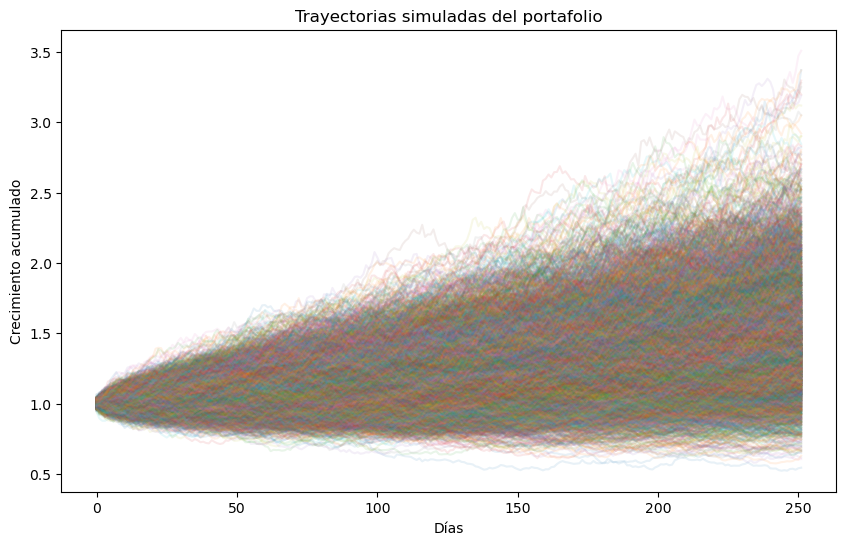

In [36]:
plt.figure(figsize=(10,6))
plt.plot(portfolio_paths,alpha=0.1)
plt.title("Trayectorias simuladas del portafolio")
plt.xlabel("Días")
plt.ylabel("Crecimiento acumulado")
plt.show()

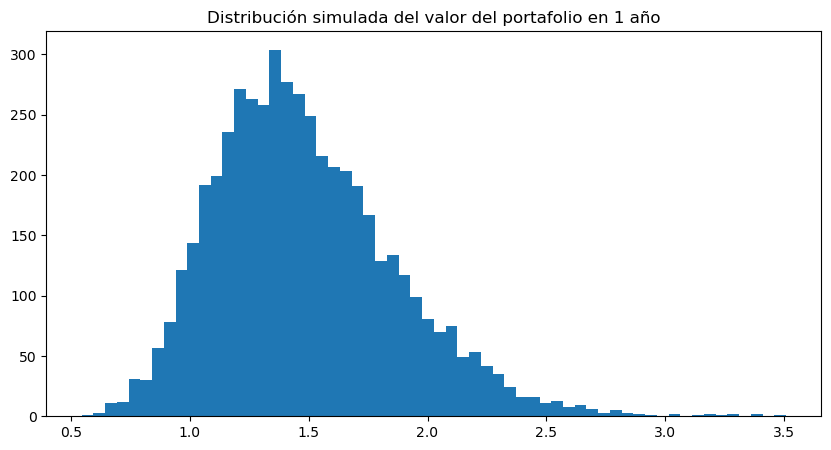

Valor esperado final: 1.4853330877066593
Probabilidad de pérdida: 0.0742


In [37]:
final_values = portfolio_paths[-1]

plt.figure(figsize=(10,5))
plt.hist(final_values,bins=60)
plt.title("Distribución simulada del valor del portafolio en 1 año")
plt.show()

print("Valor esperado final:", final_values.mean())
print("Probabilidad de pérdida:", np.mean(final_values<1))

In [38]:
valor_maximo = final_values.max()

valor_minimo = final_values.min()

print("Valor máximo observado:", valor_maximo)
print("Valor mínimo observado:", valor_minimo)

Valor máximo observado: 3.508801681195474
Valor mínimo observado: 0.5444186794651908


### Actividad

In [39]:
stocks = ["KVUE","JPM","CDNS","PANW"]
weights = np.array([0.4,0.2,0.3,0.1])

if not np.isclose(weights.sum(),1):
    raise ValueError("Los pesos deben sumar 1")

end = dt.datetime.now()
start = end - dt.timedelta(days=365*3)

In [40]:
prices = yf.download(stocks,start=start,end=end,progress=False)["Close"]
returns = prices.pct_change().dropna()

mean_returns = returns.mean()
cov_matrix = returns.cov()

print("Media diaria retornos:")
print(mean_returns)
print("\\nMatriz de covarianza:")
print(cov_matrix)

Media diaria retornos:
Ticker
CDNS    0.000711
JPM     0.001380
KVUE   -0.000215
PANW    0.001187
dtype: float64
\nMatriz de covarianza:
Ticker      CDNS       JPM      KVUE      PANW
Ticker                                        
CDNS    0.000497  0.000087  0.000012  0.000218
JPM     0.000087  0.000204  0.000034  0.000081
KVUE    0.000012  0.000034  0.000342  0.000014
PANW    0.000218  0.000081  0.000014  0.000623


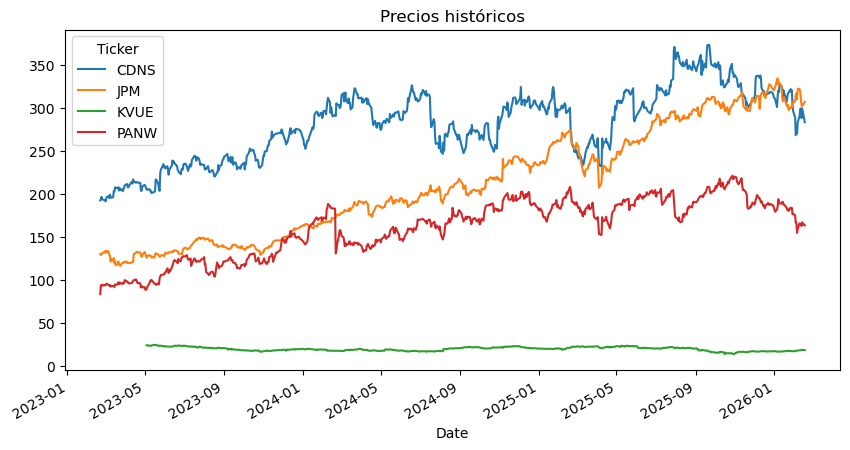

In [41]:
prices.plot(figsize=(10,5),title="Precios históricos")
plt.show()

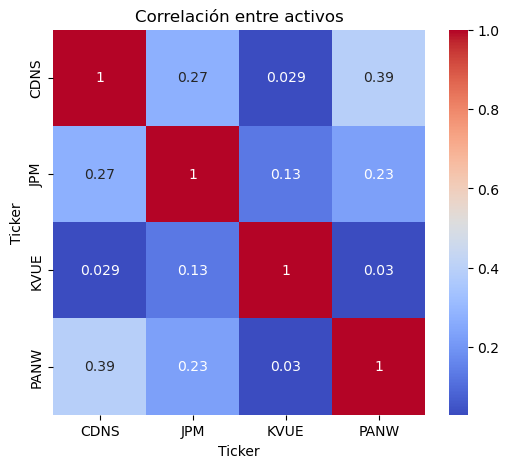

In [42]:
plt.figure(figsize=(6,5))
sns.heatmap(returns.corr(),annot=True,cmap="coolwarm")
plt.title("Correlación entre activos")
plt.show()

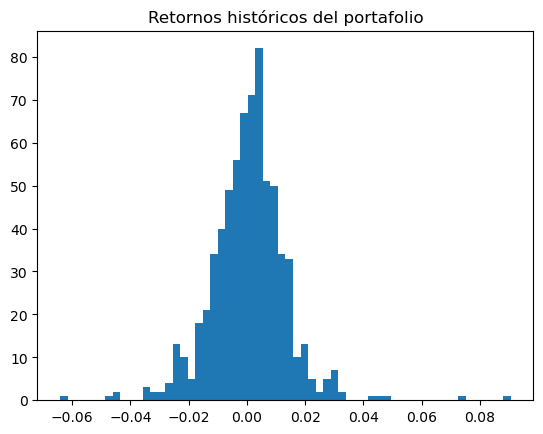

Volatilidad histórica diaria: 0.012926967868323558


In [43]:
portfolio_hist = returns.dot(weights)

plt.hist(portfolio_hist,bins=60)
plt.title("Retornos históricos del portafolio")
plt.show()

print("Volatilidad histórica diaria:", portfolio_hist.std())

In [44]:
num_sim = 5000
num_days = 252
k = len(stocks)

L = np.linalg.cholesky(cov_matrix)
portfolio_paths = np.zeros((num_days,num_sim))

In [45]:
for m in range(num_sim):

    Z = np.random.normal(size=(num_days,k))
    correlated = Z @ L.T
    daily_returns = correlated + mean_returns.values
    port_daily = daily_returns @ weights
    portfolio_paths[:,m] = np.cumprod(1+port_daily)

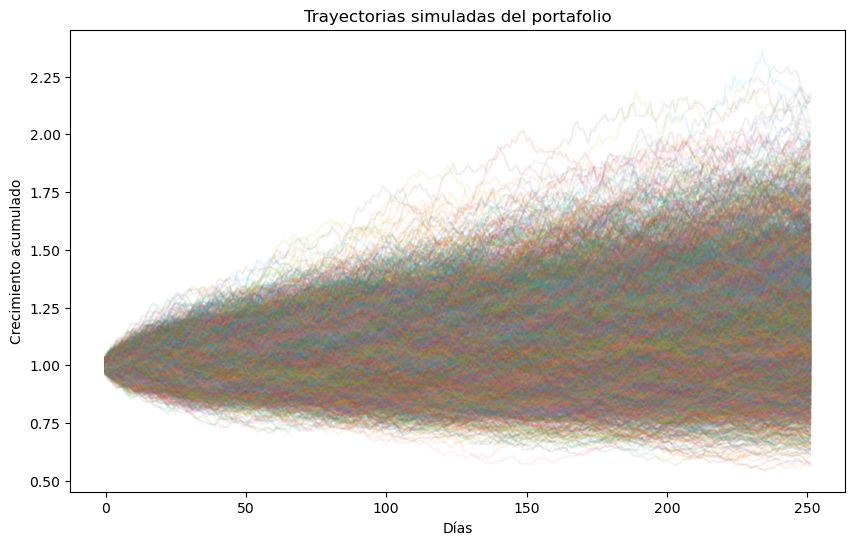

In [46]:
plt.figure(figsize=(10,6))
plt.plot(portfolio_paths,alpha=0.1)
plt.title("Trayectorias simuladas del portafolio")
plt.xlabel("Días")
plt.ylabel("Crecimiento acumulado")
plt.show()

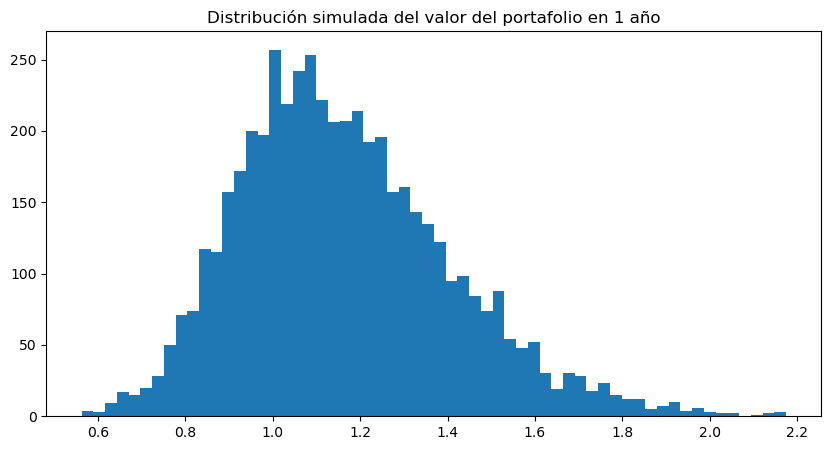

Valor esperado final: 1.1643090538554677
Probabilidad de pérdida: 0.2648


In [47]:
final_values = portfolio_paths[-1]

plt.figure(figsize=(10,5))
plt.hist(final_values,bins=60)
plt.title("Distribución simulada del valor del portafolio en 1 año")
plt.show()

print("Valor esperado final:", final_values.mean())
print("Probabilidad de pérdida:", np.mean(final_values<1))

In [48]:
valor_maximo = final_values.max()

valor_minimo = final_values.min()

print("Valor máximo observado:", valor_maximo)
print("Valor mínimo observado:", valor_minimo)

Valor máximo observado: 2.1748155644834672
Valor mínimo observado: 0.5625137763114898


- Los activos más relacionados entre sí son CDNS y PANW, porque ambos son del sector tecnológico. Esto se puede deber a que ambas pertenecen al sector de tecnologia. En cambio, KVUE y JPM se comportan diferente debido a que no pertenecen a este sector y por lo tanto su correlación es menor.

- No es un portafolio estable. La distribución simulada muestra bastante dispersión. El valor esperado final es 1.1713, lo que implica un rendimiento promedio de aproximadamente 17.13%, pero la probabilidad de pérdida es 0.253 (25.3%), lo cual es relativamente alta.

- Por ponderación, domina KVUE con 40%, ya que es el activo con mayor peso dentro del portafolio. Sin embargo, en términos de impacto en la variabilidad, los activos tecnológicos (CDNS 30% y PANW 10%) probablemente influyen más en los movimientos extremos, ya que suelen ser más volátiles.

- **¿Las trayectorias simuladas son similares entre sí o muy distintas?**

El primer portafolio es ligeramente más volátil. Sin embargo ambas trayectorias son muy similares. El segundo es más estable, con menor dispersión y comportamiento más moderado.

- **¿La dispersión aumenta con el tiempo?**

Sí, la dispersión aumenta con el tiempo, ya que las trayectorias se van separando progresivamente conforme avanzan los días.

- **¿Qué observas en la distribución final del portafolio?**

Podemos observar en el histograma que tiene una asimetria positiva, lo que nos indica que tienes más probabilidad de obtener ganancias en ese periodo. También se observa que, aunque el valor esperado es mayor que 1, existe una probabilidad no despreciable de pérdida, lo que indica presencia de riesgo junto con potencial de crecimiento.

¿Qué observas al modificar el portafolio o el horizonte?

Pueod observar que cambian las correlaciones, al igual que los valores esperedos y la volatilidad del mismo